In [10]:
# --- Instalar y configurar Kaggle CLI ---
!pip -q install kaggle



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [11]:
import os, json, zipfile, shutil

# Asume que kaggle.json ya está en la ruta local del proyecto

kaggle_json_path = "./kaggle.json"

kaggle_dir = os.path.expanduser("~/.kaggle")

os.makedirs(kaggle_dir, exist_ok=True)

shutil.copy(kaggle_json_path, os.path.join(kaggle_dir, "kaggle.json"))

os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)


!kaggle --version

print("Kaggle configurado")

Kaggle API 1.7.4.5
Kaggle configurado
Kaggle configurado


In [12]:
# --- Descargar el dataset Fruits-360 desde Kaggle ---
# Nota: '-p /content' define la carpeta destino; '--unzip' descomprime.
!kaggle datasets download -d moltean/fruits -p /content --unzip

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0


[Errno 13] Permission denied: '/content'


In [ ]:
import os


dataset_base = "./ProyectoFinal/Dataset_Filtrado"
if not os.path.exists(dataset_base):
    dataset_base = "ProyectoFinal/Dataset_Filtrado"
if not os.path.exists(dataset_base):
    dataset_base = "./Dataset_Filtrado"
if not os.path.exists(dataset_base):
    dataset_base = "Dataset_Filtrado"

if not os.path.exists(dataset_base):
    raise FileNotFoundError(f"No se encontró la carpeta del dataset en ninguna ruta esperada. Ruta probada: {dataset_base}")

carpetas = [d for d in os.listdir(dataset_base) if os.path.isdir(os.path.join(dataset_base, d))]
print("Carpetas encontradas en Dataset_Filtrado:", carpetas)

# Elige 'train' o 'test' si existen, si no muestra advertencia
if "train" in carpetas:
    dataset_origen = os.path.join(dataset_base, "train")
elif "test" in carpetas:
    dataset_origen = os.path.join(dataset_base, "test")
else:
    dataset_origen = None

assert dataset_origen, "No se encontró la carpeta 'train' o 'test' en Dataset_Filtrado."
print("Carpeta localizada:", dataset_origen)
print("Ejemplo de clases:", os.listdir(dataset_origen)[:10])

Carpetas encontradas en Dataset_Filtrado: ['test', 'train']
Carpeta localizada: ./Dataset_Filtrado/train
Ejemplo de clases: ['Pear Forelle 1', 'Kiwi 1', 'Apple Red 1', 'Cocos 1', 'Cantaloupe 2', 'Peach 2', 'Granadilla 1', 'Banana 1', 'Maracuja 1', 'Pineapple Mini 1']


In [19]:
import os, shutil, re

# 1) Muestra cómo se llaman realmente tus clases

print("Ejemplo de clases en Training:")

print(sorted(os.listdir(dataset_origen))[:60])  # dataset_origen ya lo tenías

# 2) Palabras clave a buscar (en minúsculas) -> sinónimos

wish = {

    "apple red 1": ["apple red 1"],

    "banana": ["banana"],

    "melon 2": ["cantaloupe 2","cantaloupe","melon"],

    "cocos": ["cocos","coconut"],

    "granadilla": ["granadilla"],

    "kiwi": ["kiwi"],

    "maracuja": ["maracuja"],

    "peach": ["peach"],

    "pear forelle": ["pear forelle","forelle","pear"],

    "pineapple": ["pineapple","piña","pina"]

}

# 3) Normalizador

def norm(s): return re.sub(r"\s+"," ",s.strip().lower())

# 4) Índice de carpetas reales

classes_real = os.listdir(dataset_origen)

classes_norm = {norm(c): c for c in classes_real}  # norm -> original

# 5) Buscar mejor match por “contiene”

def find_match(keywords):

    kws = [norm(k) for k in keywords]

    # prioridad: coincidencia completa; si no, contiene

    for k in kws:

        if k in classes_norm:

            return classes_norm[k]

    for k in kws:

        for cn, original in classes_norm.items():

            if k in cn:

                return original

    return None

# Ajusta la ruta destino para entorno local

destino_base = "./ProyectoFinal"

dataset_destino = os.path.join(destino_base, "Dataset_Filtrado")

os.makedirs(dataset_destino, exist_ok=True)

copiadas, faltantes = [], []

for esp, keywords in wish.items():

    found = find_match(keywords)

    if found and os.path.isdir(os.path.join(dataset_origen, found)):

        src = os.path.join(dataset_origen, found)

        dst = os.path.join(dataset_destino, found)

        shutil.copytree(src, dst, dirs_exist_ok=True)

        copiadas.append((esp, found))

        print(f"Copiada: '{esp}' -> '{found}'")

    else:

        faltantes.append((esp, keywords))

        print(f"No se encontró match para: {esp} | probé: {keywords}")

print("\nResumen:")

print("Clases copiadas:", [c[1] for c in copiadas])

print("No encontradas:", faltantes)

print("Guardado en:", dataset_destino)

Ejemplo de clases en Training:
['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Copiada: 'apple red 1' -> 'Apple Red 1'
Copiada: 'banana' -> 'Banana 1'
Copiada: 'apple red 1' -> 'Apple Red 1'
Copiada: 'banana' -> 'Banana 1'
Copiada: 'melon 2' -> 'Cantaloupe 2'
Copiada: 'cocos' -> 'Cocos 1'
Copiada: 'melon 2' -> 'Cantaloupe 2'
Copiada: 'cocos' -> 'Cocos 1'
Copiada: 'granadilla' -> 'Granadilla 1'
Copiada: 'granadilla' -> 'Granadilla 1'
Copiada: 'kiwi' -> 'Kiwi 1'
Copiada: 'maracuja' -> 'Maracuja 1'
Copiada: 'kiwi' -> 'Kiwi 1'
Copiada: 'maracuja' -> 'Maracuja 1'
Copiada: 'peach' -> 'Peach 2'
Copiada: 'pear forelle' -> 'Pear Forelle 1'
Copiada: 'peach' -> 'Peach 2'
Copiada: 'pear forelle' -> 'Pear Forelle 1'
Copiada: 'pineapple' -> 'Pineapple Mini 1'

Resumen:
Clases copiadas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1

In [20]:
import os

import shutil

import numpy as np

# === Ruta de tu dataset filtrado actual ===

dataset_filtrado = "./ProyectoFinal/Dataset_Filtrado"

# === Crear carpetas de destino ===

train_dir = os.path.join(dataset_filtrado, "train")

test_dir = os.path.join(dataset_filtrado, "test")

os.makedirs(train_dir, exist_ok=True)

os.makedirs(test_dir, exist_ok=True)

# === Proporción de división ===

train_split = 0.7  # 70% entrenamiento, 30% prueba

# === Recorrer cada clase ===

for clase in os.listdir(dataset_filtrado):

    clase_path = os.path.join(dataset_filtrado, clase)

    # Evitar las carpetas train y test ya creadas

    if os.path.isdir(clase_path) and clase not in ["train", "test"]:

        # Crear subcarpetas en train y test

        os.makedirs(os.path.join(train_dir, clase), exist_ok=True)

        os.makedirs(os.path.join(test_dir, clase), exist_ok=True)

        # Listar imágenes de la clase

        imagenes = [f for f in os.listdir(clase_path) if f.lower().endswith(('.jpg', '.png'))]

        np.random.shuffle(imagenes)

        # Dividir índices

        split_idx = int(len(imagenes) * train_split)

        train_imgs = imagenes[:split_idx]

        test_imgs = imagenes[split_idx:]

        # Copiar imágenes

        for img in train_imgs:

            shutil.copy(os.path.join(clase_path, img), os.path.join(train_dir, clase, img))

        for img in test_imgs:

            shutil.copy(os.path.join(clase_path, img), os.path.join(test_dir, clase, img))

        print(f"Clase {clase}: {len(train_imgs)} en train, {len(test_imgs)} en test")

print("\nDataset dividido en:")

print("Train ->", train_dir)

print("Test  ->", test_dir)

Clase Pear Forelle 1: 343 en train, 148 en test
Clase Kiwi 1: 228 en train, 98 en test
Clase Apple Red 1: 240 en train, 104 en test
Clase Cocos 1: 240 en train, 103 en test
Clase Cantaloupe 2: 240 en train, 104 en test
Clase Peach 2: 361 en train, 155 en test
Clase Granadilla 1: 240 en train, 103 en test
Clase Banana 1: 240 en train, 103 en test
Clase Maracuja 1: 240 en train, 103 en test
Clase Pineapple Mini 1: 241 en train, 104 en test

Dataset dividido en:
Train -> ./ProyectoFinal/Dataset_Filtrado/train
Test  -> ./ProyectoFinal/Dataset_Filtrado/test
Clase Peach 2: 361 en train, 155 en test
Clase Granadilla 1: 240 en train, 103 en test
Clase Banana 1: 240 en train, 103 en test
Clase Maracuja 1: 240 en train, 103 en test
Clase Pineapple Mini 1: 241 en train, 104 en test

Dataset dividido en:
Train -> ./ProyectoFinal/Dataset_Filtrado/train
Test  -> ./ProyectoFinal/Dataset_Filtrado/test


In [21]:
import os

import shutil

# Ruta a tu dataset filtrado

dataset_filtrado = "./ProyectoFinal/Dataset_Filtrado"

# Carpetas que quieres conservar

keep = {"train", "test"}

# Recorremos lo que hay en Dataset_Filtrado

for item in os.listdir(dataset_filtrado):

    item_path = os.path.join(dataset_filtrado, item)

    if os.path.isdir(item_path) and item not in keep:

        shutil.rmtree(item_path)  # elimina carpeta completa

        print(f"Eliminada carpeta: {item}")

print("\nLimpieza completa. Ahora solo tienes 'train/' y 'test/' dentro de Dataset_Filtrado.")

Eliminada carpeta: Pear Forelle 1
Eliminada carpeta: Kiwi 1
Eliminada carpeta: Apple Red 1
Eliminada carpeta: Cocos 1
Eliminada carpeta: Cantaloupe 2
Eliminada carpeta: Peach 2
Eliminada carpeta: Granadilla 1
Eliminada carpeta: Banana 1
Eliminada carpeta: Maracuja 1
Eliminada carpeta: Pineapple Mini 1

Limpieza completa. Ahora solo tienes 'train/' y 'test/' dentro de Dataset_Filtrado.


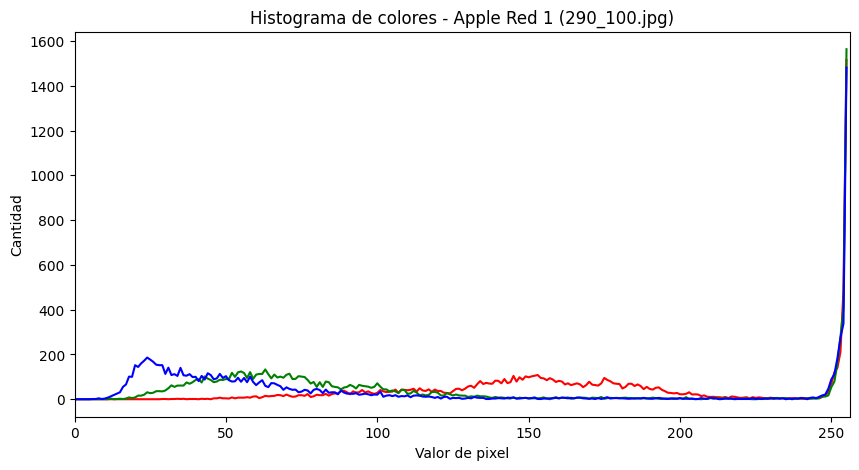

In [18]:
import os
import cv2
import matplotlib.pyplot as plt

# Carpeta de manzana dentro de Dataset_Filtrado/train (ruta absoluta para tu entorno actual)
folder = '/workspaces/fruit-detector-pricer/ProyectoFinal/Dataset_Filtrado/train/Apple Red 1'
if not os.path.exists(folder):
    raise FileNotFoundError(f"No existe la carpeta: {folder}")

imagenes = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png'))]
if not imagenes:
    raise FileNotFoundError(f"No hay imágenes en la carpeta: {folder}")

img_path = os.path.join(folder, imagenes[0])
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"No se pudo leer la imagen: {img_path}")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
for i, color in enumerate(['r', 'g', 'b']):
    hist = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=color)
    plt.xlim([0,256])
plt.title(f'Histograma de colores - Apple Red 1 ({os.path.basename(img_path)})')
plt.xlabel('Valor de pixel')
plt.ylabel('Cantidad')
plt.show()

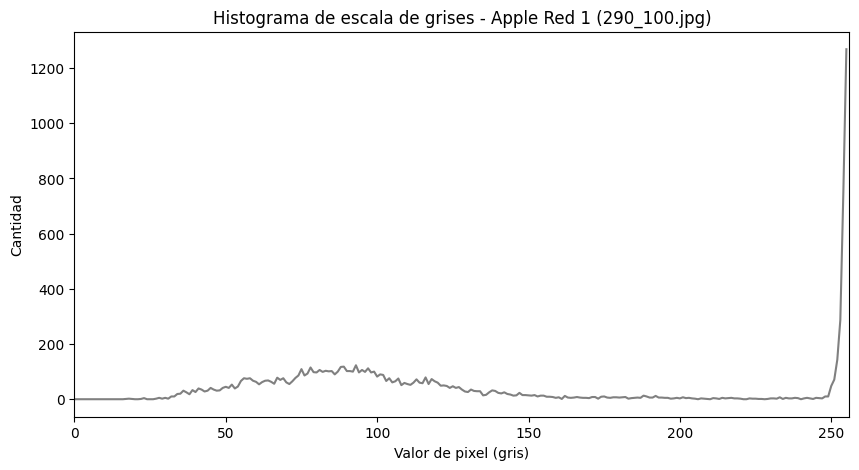

In [21]:
import os
import cv2
import matplotlib.pyplot as plt

# Carpeta de manzana dentro de Dataset_Filtrado/train (ruta absoluta para tu entorno actual)
folder = '/workspaces/fruit-detector-pricer/ProyectoFinal/Dataset_Filtrado/train/Apple Red 1'
if not os.path.exists(folder):
    raise FileNotFoundError(f"No existe la carpeta: {folder}")

imagenes = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png'))]
if not imagenes:
    raise FileNotFoundError(f"No hay imágenes en la carpeta: {folder}")

img_path = os.path.join(folder, imagenes[0])
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"No se pudo leer la imagen: {img_path}")

# Convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,5))
hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])
plt.plot(hist, color='gray')
plt.xlim([0,256])
plt.title(f'Histograma de escala de grises - Apple Red 1 ({os.path.basename(img_path)})')
plt.xlabel('Valor de pixel (gris)')
plt.ylabel('Cantidad')
plt.show()

### Niveles de Gris y su Histograma
Una imagen en escala de grises se representa como una función bidimensional f(x, y), donde cada punto tiene una intensidad entre 0 (negro puro) y 255 (blanco puro). El histograma de una imagen de este tipo muestra la cantidad de píxeles para cada nivel de gris, permitiendo analizar la distribución de intensidades y el contraste de la imagen.

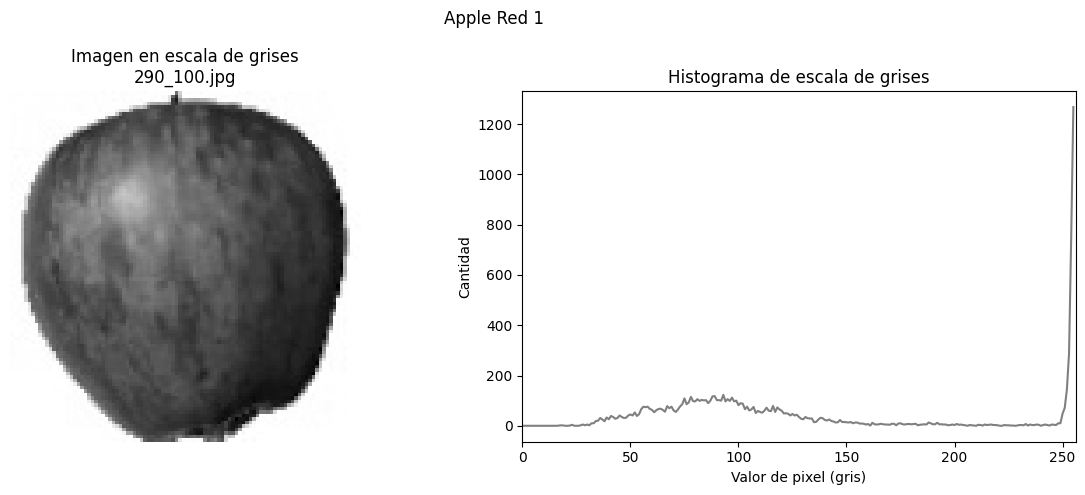

In [23]:
import os
import cv2
import matplotlib.pyplot as plt

# --- Parámetros configurables ---
folder = '/workspaces/fruit-detector-pricer/ProyectoFinal/Dataset_Filtrado/train/Apple Red 1'
imagen_idx = 0  # Cambia este índice para ver otra imagen de la carpeta

# --- Verifica la existencia de la carpeta ---
if not os.path.exists(folder):
    raise FileNotFoundError(f"No existe la carpeta: {folder}")

# --- Lista de imágenes disponibles ---
imagenes = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png'))]
if not imagenes:
    raise FileNotFoundError(f"No hay imágenes en la carpeta: {folder}")

# --- Selecciona la imagen por índice ---
if imagen_idx >= len(imagenes):
    raise IndexError(f"Índice fuera de rango. Hay {len(imagenes)} imágenes disponibles.")

img_path = os.path.join(folder, imagenes[imagen_idx])
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"No se pudo leer la imagen: {img_path}")

# --- Convierte a escala de grises ---
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Visualiza la imagen y su histograma ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Muestra la imagen en escala de grises
axs[0].imshow(img_gray, cmap='gray')
axs[0].set_title(f'Imagen en escala de grises\n{os.path.basename(img_path)}')
axs[0].axis('off')

# Histograma
hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])
axs[1].plot(hist, color='gray')
axs[1].set_xlim([0,256])
axs[1].set_title('Histograma de escala de grises')
axs[1].set_xlabel('Valor de pixel (gris)')
axs[1].set_ylabel('Cantidad')

plt.suptitle('Apple Red 1')
plt.tight_layout()
plt.show()

Número total de píxeles en la imagen: 10000


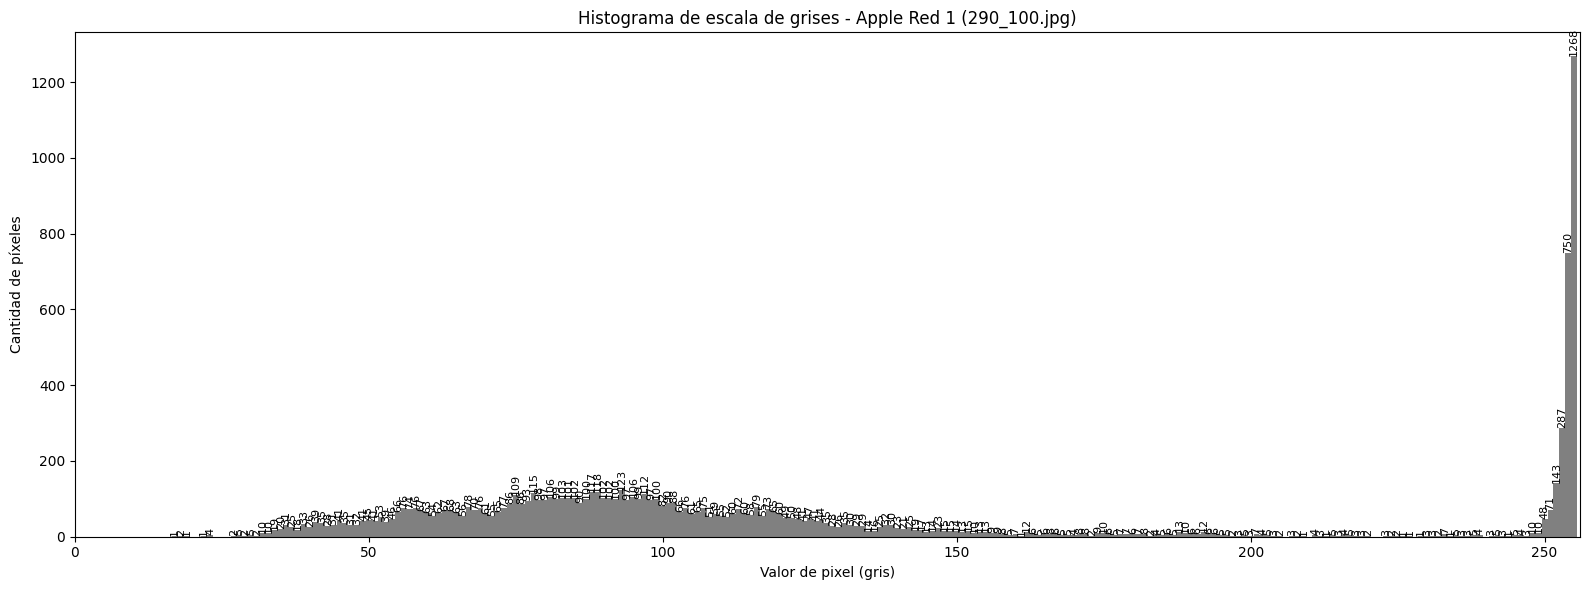

In [27]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros configurables ---
folder = '/workspaces/fruit-detector-pricer/ProyectoFinal/Dataset_Filtrado/train/Apple Red 1'
imagen_idx = 0  # Cambia este índice para ver otra imagen de la carpeta

# --- Verifica la existencia de la carpeta ---
if not os.path.exists(folder):
    raise FileNotFoundError(f"No existe la carpeta: {folder}")

# --- Lista de imágenes disponibles ---
imagenes = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png'))]
if not imagenes:
    raise FileNotFoundError(f"No hay imágenes en la carpeta: {folder}")

# --- Selecciona la imagen por índice ---
if imagen_idx >= len(imagenes):
    raise IndexError(f"Índice fuera de rango. Hay {len(imagenes)} imágenes disponibles.")

img_path = os.path.join(folder, imagenes[imagen_idx])
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"No se pudo leer la imagen: {img_path}")

# --- Convierte a escala de grises ---
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Número total de píxeles ---
num_pixeles = img_gray.size
print(f'Número total de píxeles en la imagen: {num_pixeles}')

# --- Histograma de escala de grises ---
hist = cv2.calcHist([img_gray], [0], None, [256], [0,256]).flatten()
niveles = np.arange(256)

plt.figure(figsize=(16,6))
bars = plt.bar(niveles, hist, color='gray', width=1)
plt.title(f'Histograma de escala de grises - Apple Red 1 ({os.path.basename(img_path)})')
plt.xlabel('Valor de pixel (gris)')
plt.ylabel('Cantidad de píxeles')
plt.xlim([0,256])

# --- Mostrar el número de píxeles sobre cada barra (solo si hay píxeles) ---
for nivel, cantidad in zip(niveles, hist):
    if cantidad > 0:
        plt.text(nivel, cantidad, str(int(cantidad)), ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

In [32]:
# Calcular el número de píxeles "de un lado y otro" del histograma de la imagen seleccionada
import numpy as np
lado_izq = hist[:100].sum()  # píxeles con valores de gris de 0 a 99
lado_der = hist[100:].sum() # píxeles con valores de gris de 100 a 255
print(f"Píxeles lado izquierdo (0-99): {int(lado_izq)}")
print(f"Píxeles lado derecho (100-255): {int(lado_der)}")
print(f"Total: {int(lado_izq + lado_der)} (debería coincidir con el total de la imagen)")

Píxeles lado izquierdo (0-99): 4686
Píxeles lado derecho (100-255): 5314
Total: 10000 (debería coincidir con el total de la imagen)


In [30]:
# Calcular píxeles a la izquierda y derecha de un umbral θ=150 (corregido: 0-149 y 150-255)
umbral = 150
izquierda = hist[:umbral].sum()  # píxeles con valores de gris de 0 a 149
derecha = hist[umbral:].sum()   # píxeles con valores de gris de 150 a 255
print(f"Píxeles a la izquierda de θ={umbral} (0-149): {int(izquierda)}")
print(f"Píxeles a la derecha de θ={umbral} (150-255): {int(derecha)}")
print(f"Total: {int(izquierda + derecha)} (debería coincidir con el total de la imagen)")

Píxeles a la izquierda de θ=150 (0-149): 6922
Píxeles a la derecha de θ=150 (150-255): 3078
Total: 10000 (debería coincidir con el total de la imagen)
